# NAHRD

In [1]:
import pandas as pd
import numpy as np
from numpy import pi, sqrt, log10
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50

In [2]:
stars = pd.read_csv('C:\\Users\\croni\\.spyder-py3\\hygdata_v3.csv')
stars

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,pmra,pmdec,rv,mag,absmag,spect,ci,x,y,z,vx,vy,vz,rarad,decrad,pmrarad,pmdecrad,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,0.00,0.00,0.0,-26.70,4.850,G2V,0.656,0.000005,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,-5.20,-1.88,0.0,9.10,2.390,F5,0.482,219.740502,0.003449,4.177065,4.000000e-08,-0.000006,-2.000000e-06,0.000016,0.019007,-2.521031e-08,-9.114497e-09,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,181.21,-0.93,0.0,9.27,5.866,K3V,0.999,45.210918,0.003365,-16.008996,-7.000000e-08,0.000042,-2.000000e-07,0.000074,-0.340319,8.785309e-07,-4.508767e-09,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,5.24,-2.91,0.0,6.61,-1.619,B9,-0.019,344.552785,0.030213,277.614965,3.920000e-06,0.000011,-4.860000e-06,0.000088,0.678222,2.540424e-08,-1.410808e-08,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,62.85,0.16,0.0,8.06,2.421,F0V,0.370,82.835513,0.012476,-105.619540,8.000000e-08,0.000041,6.000000e-08,0.000149,-0.905713,3.047054e-07,7.757010e-10,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119609,119611,NaN,NaN,NaN,NN 4381,NaN,NaN,23.963895,38.629391,16.9492,-162.63,-162.63,0.0,12.64,11.494,m,NaN,13.240128,-0.125297,10.581054,8.220000e-06,-0.000013,-1.044000e-05,6.273733,0.674210,-7.884525e-07,-7.884719e-07,NaN,NaN,NaN,1,119611,NaN,0.002200,NaN,NaN,NaN
119610,119612,NaN,NaN,NaN,NN 4385,NaN,NaN,23.996567,47.762093,16.7224,864.68,-210.78,0.0,16.10,14.984,m,1.870,11.240971,-0.008954,12.380596,1.273000e-05,0.000070,-1.149000e-05,6.282287,0.833606,4.192087e-06,-1.021915e-06,NaN,NaN,NaN,1,119612,NaN,0.000088,NaN,NaN,NaN
119611,119613,NaN,NaN,NaN,NN 4386,NaN,NaN,23.996218,-44.067905,18.5185,-18.83,269.34,0.0,12.82,11.482,M7,1.640,13.305832,-0.013199,-12.879810,1.682000e-05,-0.000002,1.737000e-05,6.282195,-0.769130,-9.129042e-08,1.305807e-06,NaN,NaN,NaN,1,119613,NaN,0.002224,NaN,NaN,NaN
119612,119614,NaN,NaN,NaN,NN 4387,NaN,NaN,23.997386,-34.111986,12.8205,715.88,-624.51,0.0,12.80,12.260,M4,NaN,10.614642,-0.006882,-7.189893,-2.172000e-05,0.000045,-3.214000e-05,6.282501,-0.595366,3.470684e-06,-3.027691e-06,NaN,NaN,NaN,1,119614,NaN,0.001086,NaN,NaN,NaN


In [3]:
color_idx = stars.ci

In [4]:
stars['Luminosity'] = 3.846E26*stars['lum']
stars['Temperature'] = 4600*(1/(.92*color_idx + 1.7) + 1/(.92*color_idx + .62)) ## see https://en.wikipedia.org/wiki/Color_index
stars['Radius'] = 696.34E6*(5778**2)/stars.Temperature**2*(3.827E26*stars.lum/3.827E26)**(1/2) ## derived by taking L

In [5]:
stars.loc[len(stars), ['proper','dist','Luminosity','Temperature','Radius']] = ['Zeta Ophiuchi',366/3.26156,4*pi*(8.5*696.34E6)**2*5.670374419E-8*34000**4,34000, 8.5*696.34E6]
## https://en.wikipedia.org/wiki/Zeta_Ophiuchi

In [6]:
stars['Type'] = None

stars.loc[stars.Temperature>30000, 'Type'] = 'O'
stars.loc[(stars.Temperature>10000) & (stars.Temperature<30000),'Type'] = 'B'
stars.loc[(stars.Temperature>7500) & (stars.Temperature<10000),'Type'] = 'A'
stars.loc[(stars.Temperature>6000) & (stars.Temperature<7500),'Type'] = 'F'
stars.loc[(stars.Temperature>5200) & (stars.Temperature<6000),'Type'] = 'G'
stars.loc[(stars.Temperature>3700) & (stars.Temperature<5200),'Type'] = 'K'
stars.loc[stars.Temperature<3700,'Type'] = 'M'

In [7]:
stars.sort_values(by = 'Temperature', ascending = False, inplace = True, ignore_index = True)

In [8]:
stars = stars[pd.notnull(stars['Type'])]
stars.Type.value_counts()/len(stars)*100

K    35.436114
F    26.133709
A    15.296476
G    11.522683
B     6.607323
M     5.002845
O     0.000849
Name: Type, dtype: float64

In [9]:
samp = stars.sample(n=1000)
temp = samp.Temperature
logl = log10(samp.lum)

Text(0, 0.5, '\n Absolute Magnitude')

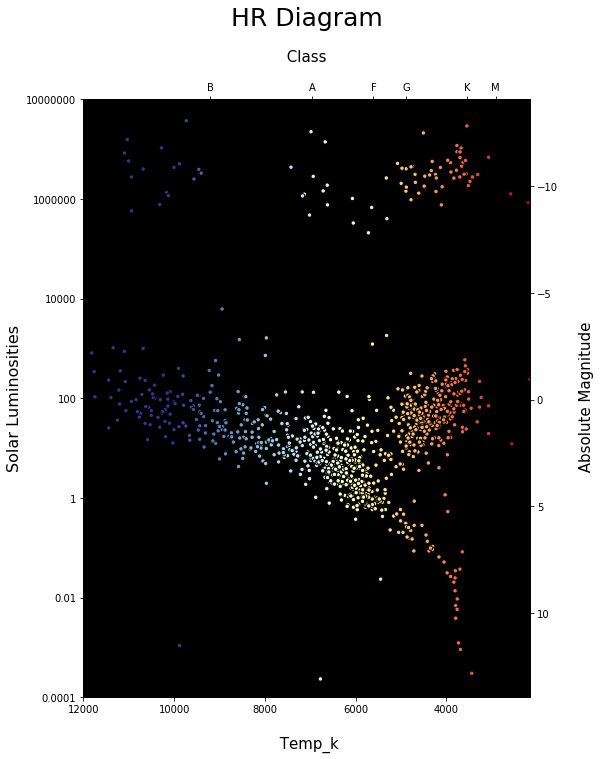

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 11))
ax.scatter(temp, logl, c = temp, cmap = 'RdYlBu', s = 20, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
#ax.scatter(temp, logl, c = temp, cmap = 'RdYlBu', s = samp.Radius/1e8, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.set_facecolor('xkcd:black')
#ax.set_xlim(max(temp), min(temp))
ax.set_xlim(12000, min(temp))
ax.set_ylim(min(logl), max(logl))
ax.set_yticks(np.array([-4,-2,0,2,4,6,8]));
ax.set_yticklabels([10**-4, 10**-2 , 1, 10**2, 10**4, 10**6, 10**7, 10**8])

ax.set_xlabel('\n Temp_k', fontsize = 15)
ax.set_ylabel('Solar Luminosities', fontsize = 16)
ax.set_title('HR Diagram', fontsize = 25)
ax.grid(False)


ax2 = ax.twiny()
ax2.set_xlim(max(temp), min(temp))
ax2.set_xticks(np.array([10000, 7500, 6000, 5200, 3700, 3000]));
ax2.set_xticklabels(['B','A','F','G','K','M']);
ax2.set_xlabel('\n Class \n', fontsize = 15)

ax3 = ax.twinx()
ax3.set_ylim(max(samp.absmag), min(samp.absmag))
ax3.set_ylabel('\n Absolute Magnitude', fontsize = 15)

#ax.set_ylabel('Log (Luminosity_Sol)', fontsize = 15)
#plt.xticks(np.array([3000,4000,5500,7000,8000,12000]), ['M','K','G','F','A','B','O']);
#ax.set_xticklabels(['B','A','F','G','K','M'], rotation = 70);

Text(0, 0.5, '\n Absolute Magnitude')

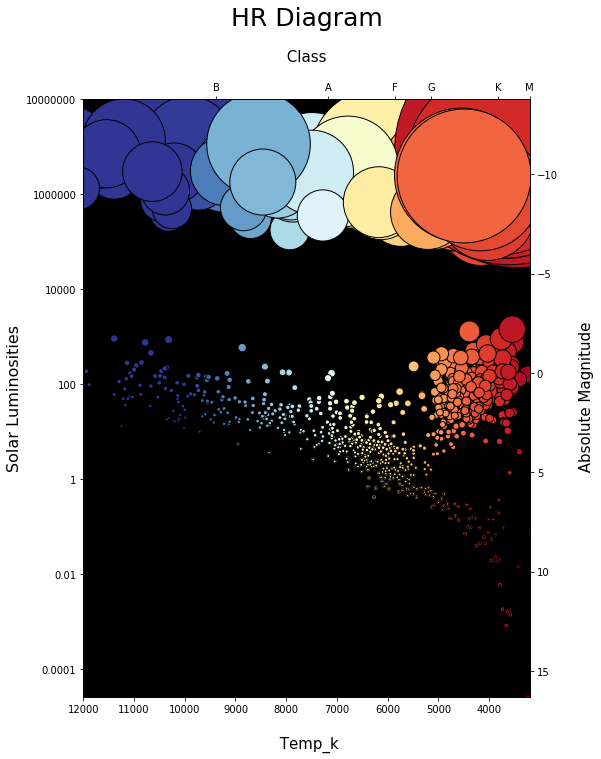

In [281]:
fig, ax = plt.subplots(1, 1, figsize = (8, 11))
ax.scatter(temp, logl, c = temp, cmap = 'RdYlBu', s = 20, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.scatter(temp, logl, c = temp, cmap = 'RdYlBu', s = samp.Radius/1e8, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.set_facecolor('xkcd:black')
#ax.set_xlim(max(temp), min(temp))
ax.set_xlim(12000, min(temp))
ax.set_ylim(min(logl), max(logl))
ax.set_yticks(np.array([-4,-2,0,2,4,6,8]));
ax.set_yticklabels([10**-4, 10**-2 , 1, 10**2, 10**4, 10**6, 10**7, 10**8])

ax.set_xlabel('\n Temp_k', fontsize = 15)
ax.set_ylabel('Solar Luminosities', fontsize = 16)
ax.set_title('HR Diagram', fontsize = 25)
ax.grid(False)


ax2 = ax.twiny()
ax2.set_xlim(max(temp), min(temp))
ax2.set_xticks(np.array([10000, 7500, 6000, 5200, 3700, 3000]));
ax2.set_xticklabels(['B','A','F','G','K','M']);
ax2.set_xlabel('\n Class \n', fontsize = 15)

ax3 = ax.twinx()
ax3.set_ylim(max(samp.absmag), min(samp.absmag))
ax3.set_ylabel('\n Absolute Magnitude', fontsize = 15)

#ax.set_ylabel('Log (Luminosity_Sol)', fontsize = 15)
#plt.xticks(np.array([3000,4000,5500,7000,8000,12000]), ['M','K','G','F','A','B','O']);
#ax.set_xticklabels(['B','A','F','G','K','M'], rotation = 70);

In [282]:
# (cidx = -2.1344*TEMP + 8464 + sqrt(.98724096*TEMP^2 + 71639296))/(1.6928*TEMP)
t_ticks = list(map(lambda t: (-2.1344*t + 8464 + sqrt(.98724096*t**2 + 71639296))/(1.6928*t),[10000, 7500, 6000, 5200, 3700, 3000]))

Text(0, 0.5, '\n Absolute Magnitude')

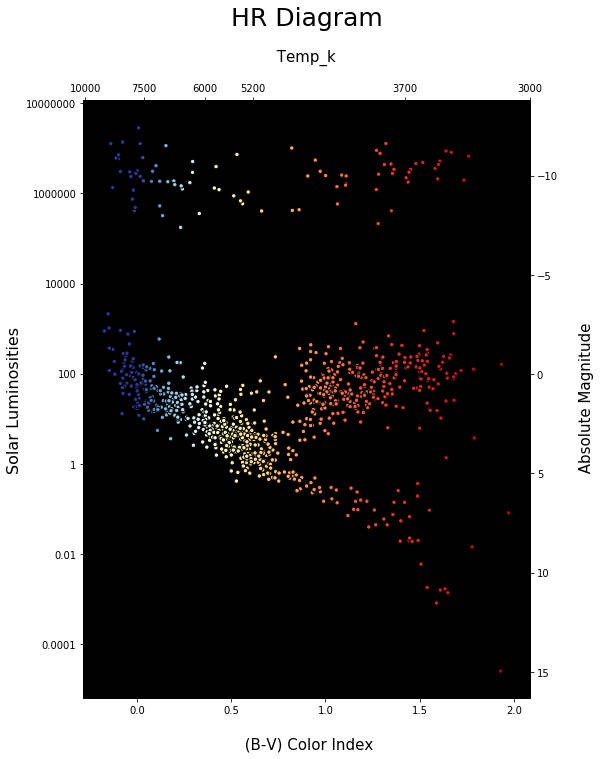

In [283]:
fig, ax = plt.subplots(1, 1, figsize = (8, 11))
ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = 20, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.set_facecolor('xkcd:black')

ax.set_yticks(np.array([-4,-2,0,2,4,6,8]));
ax.set_yticklabels([10**-4, 10**-2 , 1, 10**2, 10**4, 10**6, 10**7, 10**8])

ax.set_xlabel('\n (B-V) Color Index', fontsize = 15)
ax.set_ylabel('Solar Luminosities', fontsize = 16)
ax.set_title('HR Diagram', fontsize = 25)
ax.grid(False)

temp_ticks = list(map(lambda t: (-2.1344*t + 8464 + sqrt(.98724096*t**2 + 71639296))/(1.6928*t),[10000, 7500, 6000, 5200, 3700, 3000]))

ax2 = ax.twiny()
ax2.set_xticks(np.array(temp_ticks));
ax2.set_xticklabels([10000, 7500, 6000, 5200, 3700, 3000]);
ax2.set_xlabel('\n Temp_k \n', fontsize = 15)

ax3 = ax.twinx()
ax3.set_ylim(max(samp.absmag), min(samp.absmag))
ax3.set_ylabel('\n Absolute Magnitude', fontsize = 15)

#ax.set_ylabel('Log (Luminosity_Sol)', fontsize = 15)
#plt.xticks(np.array([3000,4000,5500,7000,8000,12000]), ['M','K','Gf,'F','A','B','O']);
#ax.set_xticklabels(['B','A','F','G','K','M'], rotation = 70);

Text(0, 0.5, '\n Absolute Magnitude')

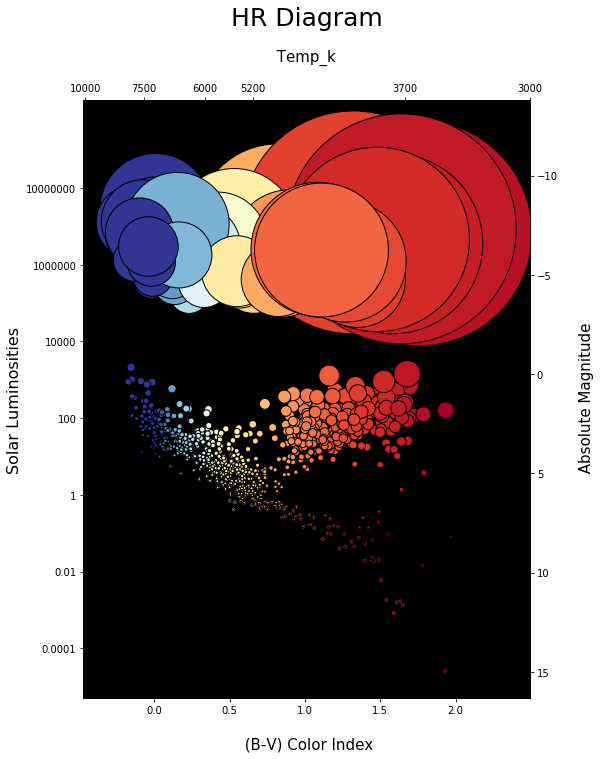

In [284]:
fig, ax = plt.subplots(1, 1, figsize = (8, 11))
ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = 20, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = samp.Radius/1e8, linewidths = 1, edgecolors = 'black', vmax = len(samp)*10)
ax.set_facecolor('xkcd:black')

ax.set_yticks(np.array([-4,-2,0,2,4,6,8]));
ax.set_yticklabels([10**-4, 10**-2 , 1, 10**2, 10**4, 10**6, 10**7, 10**8])

ax.set_xlabel('\n (B-V) Color Index', fontsize = 15)
ax.set_ylabel('Solar Luminosities', fontsize = 16)
ax.set_title('HR Diagram', fontsize = 25)
ax.grid(False)

temp_ticks = list(map(lambda t: (-2.1344*t + 8464 + sqrt(.98724096*t**2 + 71639296))/(1.6928*t),[10000, 7500, 6000, 5200, 3700, 3000]))

ax2 = ax.twiny()
ax2.set_xticks(np.array(temp_ticks));
ax2.set_xticklabels([10000, 7500, 6000, 5200, 3700, 3000]);
ax2.set_xlabel('\n Temp_k \n', fontsize = 15)

ax3 = ax.twinx()
ax3.set_ylim(max(samp.absmag), min(samp.absmag))
ax3.set_ylabel('\n Absolute Magnitude', fontsize = 15)

#ax.set_ylabel('Log (Luminosity_Sol)', fontsize = 15)
#plt.xticks(np.array([3000,4000,5500,7000,8000,12000]), ['M','K','Gf,'F','A','B','O']);
#ax.set_xticklabels(['B','A','F','G','K','M'], rotation = 70);

Text(0, 0.5, '\n Absolute Magnitude')

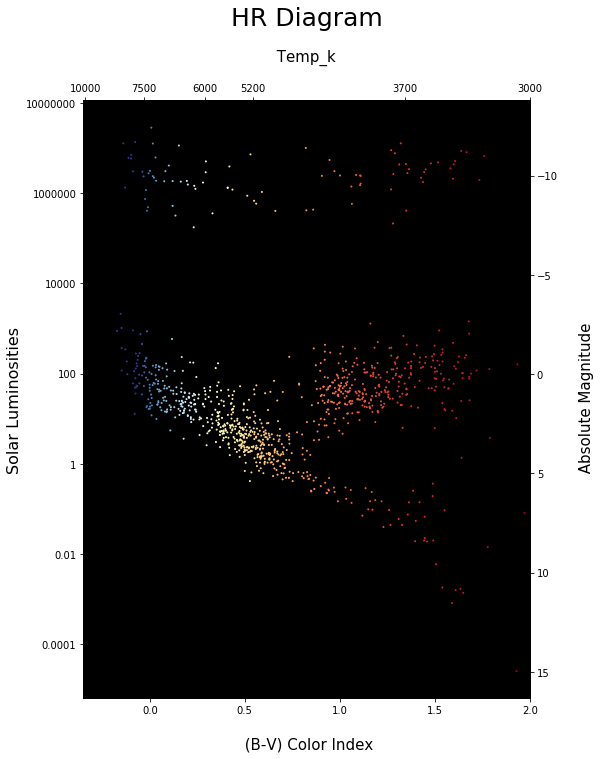

In [285]:
fig, ax = plt.subplots(1, 1, figsize = (8, 11))
#ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = 1, linewidths = 1, edgecolors = 'black', vmax = 11000)
ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = 1, vmax = 11000)
#ax.scatter(samp.ci, logl, c = temp, cmap = 'RdYlBu', s = 7, linewidths = 1, edgecolors = 'black')
ax.set_facecolor('xkcd:black')
ax.set_xlim(-.35, 2)

ax.set_yticks(np.array([-4,-2,0,2,4,6,8]));
ax.set_yticklabels([10**-4, 10**-2 , 1, 10**2, 10**4, 10**6, 10**7, 10**8])

ax.set_xlabel('\n (B-V) Color Index', fontsize = 15)
ax.set_ylabel('Solar Luminosities', fontsize = 16)
ax.set_title('HR Diagram', fontsize = 25)
ax.grid(False)

temp_ticks = list(map(lambda t: (-2.1344*t + 8464 + sqrt(.98724096*t**2 + 71639296))/(1.6928*t),[10000, 7500, 6000, 5200, 3700, 3000]))

ax2 = ax.twiny()
ax2.set_xticks(np.array(temp_ticks));
ax2.set_xticklabels([10000, 7500, 6000, 5200, 3700, 3000]);
ax2.set_xlabel('\n Temp_k \n', fontsize = 15)

ax3 = ax.twinx()
ax3.set_ylim(max(samp.absmag), min(samp.absmag))
ax3.set_ylabel('\n Absolute Magnitude', fontsize = 15)

#ax.set_ylabel('Log (Luminosity_Sol)', fontsize = 15)
#plt.xticks(np.array([3000,4000,5500,7000,8000,12000]), ['M','K','Gf,'F','A','B','O']);
#ax.set_xticklabels(['B','A','F','G','K','M'], rotation = 70);

In [11]:
%gui qt
from mayavi import mlab
import mayavi

In [12]:
# module.actor.property.color = (0,0,0)
mlab.points3d(stars.loc[:,'x'], stars.loc[:,'y'], stars.loc[:,'z'], mode = 'point') 

In [13]:
stars["radius_rank"] = stars.Radius.rank(method = "min", ascending = True)
stars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,pmra,pmdec,rv,mag,absmag,spect,ci,x,y,z,vx,vy,vz,rarad,decrad,pmrarad,pmdecrad,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max,Luminosity,Temperature,Radius,Type,radius_rank
0,NaN,NaN,NaN,NaN,NaN,NaN,Zeta Ophiuchi,NaN,NaN,112.21624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.335937e+31,34000.000000,5.918890e+09,O,79770.0
1,56840.0,57010.0,101616.0,NaN,NaN,NaN,NaN,11.688461,-50.203325,115.47340,-51.60,12.19,0.0,9.01,3.698,F3V,-0.40,-73.664792,6.021601,-88.720600,-0.000003,0.000029,0.000004,3.060032,-0.876213,-2.501639e-07,5.909879e-08,NaN,NaN,Cen,1.0,56840.0,NaN,2.889349e+00,NaN,NaN,NaN,1.111244e+27,21707.421707,8.386098e+07,B,687.0
2,67314.0,67527.0,120395.0,NaN,NaN,NaN,NaN,13.835450,-44.850888,59.10170,-46.75,-68.52,0.0,8.27,4.412,G0V,-0.40,-37.154892,-19.367755,-41.682311,0.000006,0.000018,-0.000014,3.622112,-0.782796,-2.266504e-07,-3.321943e-07,NaN,NaN,Cen,1.0,67314.0,NaN,1.496925e+00,NaN,NaN,NaN,5.757173e+26,21707.421707,6.036149e+07,B,488.0
3,85335.0,85595.0,158143.0,NaN,NaN,NaN,NaN,17.491022,-40.312789,869.56520,-7.86,-10.04,0.0,8.44,-1.257,B9V,-0.40,-88.092189,-657.186433,-562.573902,-0.000029,0.000032,-0.000032,4.579139,-0.703591,-3.810636e-08,-4.867529e-08,NaN,NaN,Sco,1.0,85335.0,NaN,2.772043e+02,NaN,NaN,NaN,1.066128e+29,21707.421707,8.214099e+08,B,14128.0
4,30209.0,30282.0,44416.0,NaN,NaN,NaN,NaN,6.369987,12.038784,505.05050,-7.51,-6.77,0.0,8.20,-0.317,A0,-0.40,-47.769733,491.627385,105.340279,0.000018,0.000005,-0.000016,1.667659,0.210116,-3.640951e-08,-3.282189e-08,NaN,NaN,Ori,1.0,30209.0,NaN,1.166272e+02,NaN,NaN,NaN,4.485484e+28,21707.421707,5.327947e+08,B,5735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117728,62205.0,62401.0,111166.0,NaN,NaN,NaN,NaN,12.788448,4.144822,100000.00000,11.25,-25.11,2.0,11.98,-8.020,C0,4.40,-97621.199673,-20441.641325,7227.771289,0.000255,-0.005519,-0.012141,3.348008,0.072341,5.454154e-08,-1.217367e-07,NaN,NaN,Vir,1.0,62205.0,NaN,1.406048e+05,RU,12.773,10.663,5.407659e+31,1785.711091,2.733720e+12,M,115927.0
117729,77265.0,77501.0,141826.0,NaN,NaN,NaN,NaN,15.825364,39.571637,100000.00000,5.56,-14.67,-115.0,10.10,-9.900,N2,4.41,-41552.135696,-64924.484410,63704.247404,-0.000123,-0.005192,-0.005557,4.143071,0.690655,2.695564e-08,-7.112217e-08,NaN,NaN,CrB,1.0,77265.0,NaN,7.943282e+05,V,11.148,8.688,3.054986e+32,1782.493912,6.521092e+12,M,117610.0
117730,26892.0,26958.0,NaN,NaN,NaN,NaN,NaN,5.720509,-46.453841,775.19380,-2.62,15.33,0.0,7.98,-1.467,N0v,4.75,39.042759,532.632005,-561.875642,0.000013,0.000041,0.000040,1.497626,-0.810772,-1.270212e-08,7.432194e-08,NaN,NaN,Pic,1.0,26892.0,NaN,3.363566e+02,W,8.333,7.713,1.293628e+29,1679.669058,1.511224e+11,M,107946.0
117731,43780.0,43905.0,NaN,NaN,NaN,NaN,NaN,8.944483,19.849147,100000.00000,-4.89,5.07,0.0,9.27,-10.730,R6v,5.30,-65536.082084,67469.361999,33954.486250,0.002282,0.001053,0.002312,2.341660,0.346433,-2.370739e-08,2.458005e-08,NaN,NaN,Cnc,1.0,43780.0,NaN,1.706082e+06,T,9.357,8.727,6.561593e+32,1536.485726,1.286232e+13,M,117722.0


In [14]:
stars.set_index(['Type', 'Temperature'], inplace = True)

In [15]:
#stars.sort_index(inplace = True)
#stars

In [16]:
#stars.reset_index()